# Heart Disease

## 1. Data Preparation

### 1.1 Get Data

In [266]:
#Get data
import pandas as pd
train_values = pd.read_csv('https://s3.amazonaws.com/drivendata/data/54/public/train_values.csv')
train_labels = pd.read_csv('https://s3.amazonaws.com/drivendata/data/54/public/train_labels.csv')

In [267]:
#Join data together
#heartdata = pd.merge(train_values, train_labels, how = 'inner', on = 'patient_id')

heartdata = train_values

In [268]:
train_values.head(5)

patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   
2                                     0                    2   
3                                     0                    0   
4                                     0                    2   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   
2                          304                       0.0    1   77   
3                          223                       0.0    1   40   
4                          270                       4.2    1   59   

   max_heart_rate_achieved  exercise_induced_angina  
0                      170                        0  
1                      158                        0  
2                      162                        1  
3                      181                        0  
4                      145                        0

In [269]:
train_labels.head()

patient_id  heart_disease_present
0     0z64un                      0
1     ryoo3j                      0
2     yt1s1x                      1
3     l2xjde                      1
4     oyt4ek                      0

In [270]:
heartdata.head()

patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   
2                                     0                    2   
3                                     0                    0   
4                                     0                    2   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   
2                          304                       0.0    1   77   
3                          223                       0.0    1   40   
4                          270                       4.2    1   59   

   max_heart_rate_achieved  exercise_induced_angina  
0                      170                        0  
1                      158                        0  
2                      162                        1  
3                      181                        0  
4                      145                        0

### 1.2 Analyse & Clean data 

In [271]:
heartdata.describe()

slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.694444   
std           0.938454           0.969347   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000           3.000000   

       fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
count                            180.000000           180.000000   
mean                               0.161111             1.050000   
std                                0.368659             0.998742   
min                                0.000000             0.000000   
25%                                0.000000             0.000000   
50%                                0.000000             2.000000   
75%                                0.000000             2.000000   
max                                1.000000             2.000000   

       serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression         sex  \
count                   180.000000                180.000000  180.000000   
mean                    249.211111                  1.010000    0.688889   
std                      52.717969                  1.121357    0.464239   
min                     126.000000                  0.000000    0.000000   
25%                     213.750000                  0.000000    0.000000   
50%                     245.500000                  0.800000    1.000000   
75%                     281.250000                  1.600000    1.000000   
max                     564.000000                  6.200000    1.000000   

              age  max_heart_rate_achieved  exercise_induced_angina  
count  180.000000               180.000000               180.000000  
mean    54.811111               149.483333                 0.316667  
std      9.334737                22.063513                 0.466474  
min     29.000000                96.000000                 0.000000  
25%     48.000000               132.000000                 0.000000  
50%     55.000000               152.000000                 0.000000  
75%     62.000000               166.250000                 1.000000  
max     77.000000               202.000000                 1.000000

In [272]:
heartdata.isnull().any().any()
#no missing values

False

In [273]:
#Determine possible categorical variables (for 1 hot encoding)
heartdata['resting_ekg_results'].value_counts()

2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64

In [274]:
heartdata['num_major_vessels'].value_counts()

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

In [275]:
heartdata['chest_pain_type'].value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

In [276]:
heartdata['slope_of_peak_exercise_st_segment'].value_counts()

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64

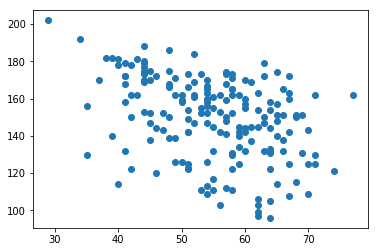

In [277]:
import matplotlib.pyplot as plt

# Make a line plot: year on the x-axis, pop on the y-axis
plt.scatter(train_values['age'], train_values['max_heart_rate_achieved'])

# Display the plot with plt.show()
plt.show()

(array([ 7., 12., 15., 17., 27., 33., 36., 24.,  7.,  2.]),
 array([ 96. , 106.6, 117.2, 127.8, 138.4, 149. , 159.6, 170.2, 180.8,
        191.4, 202. ]),
 <a list of 10 Patch objects>)

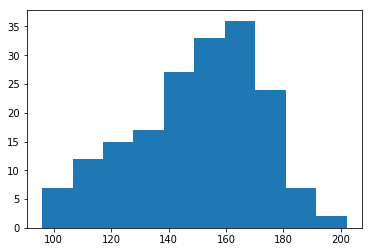

In [278]:
plt.hist(train_values['max_heart_rate_achieved'])

### One-hot encoding categorical variables

In [279]:
#One hot encoding of the thal variable
heartdata['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [280]:
heartdata = pd.get_dummies(heartdata, columns = ['thal'])

# 3.Model Building

In [281]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [282]:
#Join data together
data = pd.merge(heartdata, train_labels, how = 'inner', on = 'patient_id')

In [283]:
X = data.drop(['heart_disease_present', 'patient_id'], axis = 1)
y = data['heart_disease_present']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) # 70% training and 30% test

In [284]:
print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (126, 15)
Test: (54, 15)


## 3.1 Random Forest

In [285]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred_prob=clf.predict_proba(X_test)

In [286]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import log_loss


def evaluat_classification_prediction(y_test, y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("AUC:",metrics.roc_auc_score(y_test, y_pred))
    print("Confusion matrix:", confusion_matrix(y_test, y_pred))
    print("Log Loss:", log_loss(y_test,y_pred_prob))
    
evaluat_classification_prediction(y_test, y_pred)

Accuracy: 0.8333333333333334
AUC: 0.8448275862068966
Confusion matrix: [[25  0]
 [ 9 20]]
Log Loss: 0.4486320441594104


## 3.2 Parameter Sweeping with Random Forest

In [288]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


from sklearn.tree import DecisionTreeClassifier


#Parameter sweeping
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300, 350],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 15]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'AUC': 'roc_auc',
    'Log Loss': 'log_loss'
}

def grid_search_wrapper(refit_score='Log Loss'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)
    y_pred_prob = grid_search.predict_proba(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    print("Log Loss:", log_loss(y_test,y_pred_prob))
    return grid_search

grid_search_clf = grid_search_wrapper()

Best params for Log Loss
{'max_depth': 25, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}

Confusion matrix of Random Forest optimized for Log Loss on the test data:
     pred_neg  pred_pos
neg        25         0
pos         9        20
Log Loss: 0.46083491319053077


In [289]:
results = pd.DataFrame(grid_search_clf.cv_results_)

results.sort_values(by="mean_test_Log Loss", ascending =False)



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
112       0.625731      0.061558         0.540856        0.020633   
39        0.251464      0.012640         0.529378        0.009218   
113       0.788376      0.033629         0.532326        0.023444   
73        0.618473      0.105933         0.560514        0.039773   
108       0.229173      0.026080         0.521817        0.003102   
40        0.592387      0.046183         0.539100        0.026317   
77        0.910663      0.169520         0.581176        0.075553   
48        0.284903      0.085234         0.535535        0.015285   
76        0.791172      0.068684         0.568399        0.033000   
109       0.550407      0.052754         0.520073        0.002716   
37        0.590777      0.050421         0.523338        0.007484   
38        0.691869      0.038879         0.524458        0.004192   
41        0.830825      0.091604         0.569525        0.033868   
120       0.268603      0.023948         0.567784        0.062098   
122       1.003339      0.136795         0.690272        0.115363   
47        1.355607      0.068152         0.722314        0.133078   
72        0.266827      0.039664         0.524183        0.005283   
110       0.720595      0.054167         0.525480        0.004281   
121       0.633804      0.090280         0.582153        0.054397   
78        0.278880      0.041774         0.542884        0.023296   
42        0.271977      0.019508         0.530439        0.010950   
52        0.575918      0.075581         0.529897        0.017830   
119       0.721872      0.094696         0.537741        0.033560   
51        0.229084      0.030185         0.520498        0.001570   
74        1.124227      0.118820         0.576235        0.025833   
49        0.612376      0.075854         0.534422        0.011835   
84        0.241018      0.041656         0.521427        0.002547   
53        0.715184      0.040080         0.528439        0.013991   
10        0.585730      0.027305         0.521654        0.005888   
9         0.231660      0.040042         0.526208        0.008296   
..             ...           ...              ...             ...   
27        0.222303      0.011446         0.522331        0.002284   
35        0.814752      0.145737         0.520227        0.002104   
57        0.221533      0.035627         0.523448        0.005931   
128       0.934800      0.129149         0.544899        0.019419   
65        0.766732      0.082582         0.521108        0.002687   
34        0.737744      0.141101         0.624337        0.071301   
117       0.320151      0.050332         0.536121        0.016257   
31        0.670593      0.093208         0.584809        0.056895   
133       0.544741      0.038321         0.517217        0.002570   
140       0.807456      0.080883         0.533270        0.014472   
127       0.744759      0.079472         0.542562        0.030135   
71        0.802251      0.017880         0.545373        0.022278   
139       0.551687      0.053933         0.518460        0.004713   
102       0.228716      0.023567         0.524932        0.010014   
136       0.561637      0.054384         0.518644        0.005137   
141       0.233928      0.037218         0.518754        0.001067   
99        0.308872      0.041130         0.535907        0.015743   
66        0.255450      0.043611         0.527379        0.009053   
100       0.659770      0.112162         0.531285        0.009294   
69        0.256815      0.020666         0.530869        0.015047   
126       0.269465      0.053197         0.542750        0.018071   
104       0.898578      0.176545         0.572291        0.050701   
107       0.930007      0.091369         0.546554        0.047616   
101       0.933482      0.098157         0.546671        0.022587   
70        0.674982      0.136628         0.569996        0.037587   
137       0.722466      0.053283         0.526843        0.007464   
138

In [ ]:
grid_search_clf.best_params_

## 3.3 Feature Importance

In [129]:
feature_imp = pd.Series(clf.feature_importances_, index=list(X)).sort_values(ascending=False)
feature_imp

oldpeak_eq_st_depression                0.120396
thal_normal                             0.104712
age                                     0.097274
max_heart_rate_achieved                 0.096707
num_major_vessels                       0.091508
thal_reversible_defect                  0.079679
chest_pain_type                         0.077263
serum_cholesterol_mg_per_dl             0.076796
resting_blood_pressure                  0.070351
exercise_induced_angina                 0.067047
slope_of_peak_exercise_st_segment       0.060814
sex                                     0.024010
resting_ekg_results                     0.019270
fasting_blood_sugar_gt_120_mg_per_dl    0.009896
thal_fixed_defect                       0.004278
dtype: float64

No handles with labels found to put in legend.


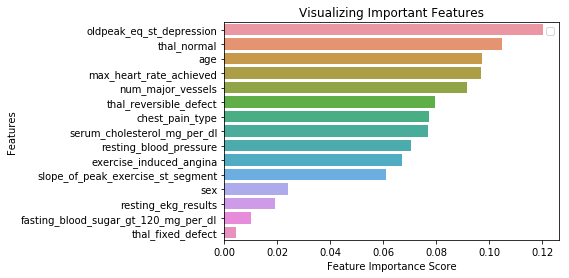

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [136]:
important_test_features = X_test.drop(['thal_fixed_defect','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results'], axis = 1)
important_train_features = X_train.drop(['thal_fixed_defect','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results'], axis = 1)

In [142]:
clf.fit(important_train_features,y_train)
y_pred=clf.predict(important_test_features)

evaluat_classification_prediction(y_test, y_pred)


Accuracy: 0.8148148148148148
AUC: 0.8248275862068966
Accuracy: 0.8148148148148148
AUC: 0.8248275862068966


# 4. Deployment

Best parameters determined by our sweep: 
 'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 10,
 'n_estimators': 100}
 

 'max_depth': 25, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}
 
Train on all data we have, with these optimal parameters

## 4.1 Create large training set

In [195]:
#Download test data
test_values = pd.read_csv('https://s3.amazonaws.com/drivendata/data/54/public/test_values.csv')
#Apply cleaning
test = pd.get_dummies(test_values, columns = ['thal'])

In [290]:
X_train = data.drop(['heart_disease_present', 'patient_id'], axis = 1)
y_train = data['heart_disease_present']

X_test = test.drop(['patient_id'], axis = 1)

print(X_test.shape)
print(X_train.shape)

(90, 15)
(180, 15)


## 4.2 Create model with optimal parameters

In [291]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_test)

In [292]:


submission = pd.DataFrame({'patient_id':test['patient_id'],'heart_disease_present':pd.DataFrame(y_pred)[1]})
submission.to_csv("submission.csv", index = False)
